### Customer Segmentation using Clustering Algorithms

#### 📖 Project Description
##### Customer Segmentation is the process of dividing customers into different groups based on their similarities. These similarities may include purchasing behavior, income level, age, or spending habits. Instead of treating all customers the same, businesses can use customer segmentation to better understand their customers and provide personalized services.
##### In this project, clustering algorithms are used to segment customers without predefined labels. The system automatically groups customers based on patterns found in the data. This helps businesses identify different types of customers and make better marketing and business decisions

#### IMPORT LIBRARIES

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("customer data.csv")
data.head()

,Customer ID,Age,Gender,Annual Income,Spending Score
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,Male,151479,89
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,Female,185088,95
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,Female,70912,76
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,Male,55460,57
4,64139426-2226-4cd6-bf09-91bce4b4db5e,24,Male,153752,76


In [4]:
data.tail()

,Customer ID,Age,Gender,Annual Income,Spending Score
15074,a0504768-a85f-4930-ac24-55bc8e4fec9e,29,Female,97723,30
15075,a08c4e0e-d1fe-48e7-9366-aab11ae409cd,22,Male,73361,74
15076,0e87c25a-268c-401a-8ba1-7111dcde6f1a,18,Female,112337,48
15077,5f388cbe-3373-4e16-b743-38f508f2249f,26,Female,94312,5
15078,b8b8f561-ebca-4401-8afe-544c906554ba,19,Male,78045,2


In [5]:
data.shape

(15079, 5)

In [6]:
data.size

75395

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15079 entries, 0 to 15078
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Customer ID     15079 non-null  object
 1   Age             15079 non-null  int64 
 2   Gender          15079 non-null  object
 3   Annual Income   15079 non-null  int64 
 4   Spending Score  15079 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 589.2+ KB


In [8]:
data.describe()

,Age,Annual Income,Spending Score
count,15079.000000,15079.000000,15079.000000
mean,54.191591,109742.880562,50.591617
std,21.119207,52249.425866,28.726977
min,18.000000,20022.000000,1.000000
25%,36.000000,64141.000000,26.000000
50%,54.000000,109190.000000,51.000000
75%,72.000000,155008.000000,75.000000
max,90.000000,199974.000000,100.000000


In [9]:
data.isnull().sum() 

Customer ID       0
Age               0
Gender            0
Annual Income     0
Spending Score    0
dtype: int64

In [10]:
data.columns

Index(['Customer ID', 'Age', 'Gender', 'Annual Income', 'Spending Score'], dtype='object')

In [11]:
data.duplicated().sum()

np.int64(0)

In [12]:
X = data.iloc[:, [3, 4]]   
print("\nSelected Features:")
print(X.head())


Selected Features:
   Annual Income  Spending Score
0         151479              89
1         185088              95
2          70912              76
3          55460              57
4         153752              76


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

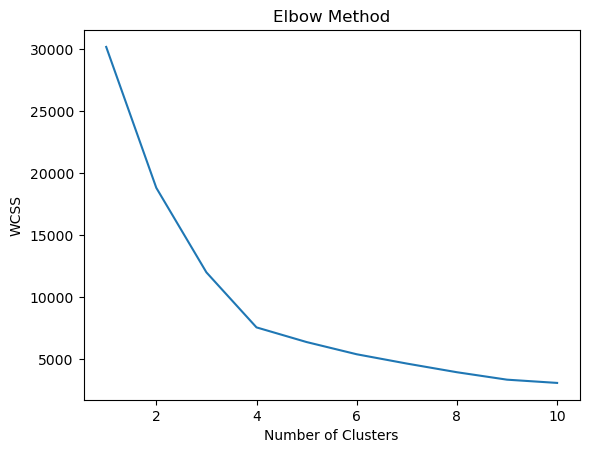

In [14]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [15]:
kmeans = KMeans(n_clusters=5, random_state=42)  # Change cluster number based on elbow graph
y_kmeans = kmeans.fit_predict(X_scaled)

In [16]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_scaled, y_kmeans)
print("\nSilhouette Score:", score)


Silhouette Score: 0.39061699548257833


In [17]:
data['Cluster'] = y_kmeans
print("\nDataset with Cluster Labels:")
print(data.head())


Dataset with Cluster Labels:
                            Customer ID  Age  Gender  Annual Income  \
0  d410ea53-6661-42a9-ad3a-f554b05fd2a7   30    Male         151479   
1  1770b26f-493f-46b6-837f-4237fb5a314e   58  Female         185088   
2  e81aa8eb-1767-4b77-87ce-1620dc732c5e   62  Female          70912   
3  9795712a-ad19-47bf-8886-4f997d6046e3   23    Male          55460   
4  64139426-2226-4cd6-bf09-91bce4b4db5e   24    Male         153752   

   Spending Score  Cluster  
0              89        2  
1              95        2  
2              76        4  
3              57        4  
4              76        2  


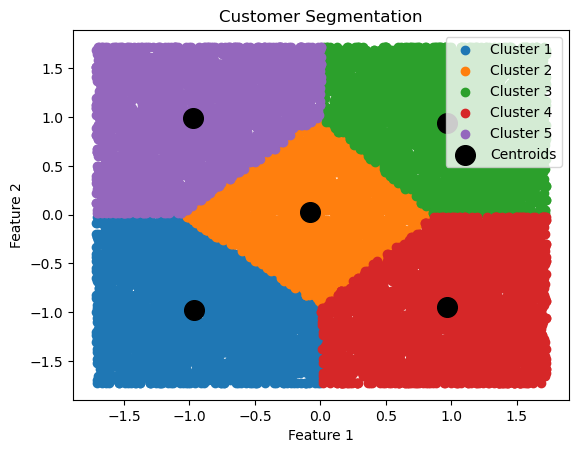

In [18]:
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], label='Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], label='Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], label='Cluster 3')
plt.scatter(X_scaled[y_kmeans == 3, 0], X_scaled[y_kmeans == 3, 1], label='Cluster 4')
plt.scatter(X_scaled[y_kmeans == 4, 0], X_scaled[y_kmeans == 4, 1], label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s=200, c='black', label='Centroids')

plt.title("Customer Segmentation")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()